In [1]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

fatal: destination path 'DeOldify' already exists and is not an empty directory.


In [2]:
cd DeOldify

/Users/apichet/DeOldify


In [3]:
conda env create -f environment.yml


CondaValueError: prefix already exists: /Users/apichet/opt/anaconda3/envs/deoldify


Note: you may need to restart the kernel to use updated packages.


In [4]:
conda activate --stack myenv


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.



Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install 'bertopic[visualization]'

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install 'requests[security]'

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [9]:
from PIL import Image

In [10]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

GPU not available.


In [11]:
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [12]:
torch.backends.cudnn.benchmark = True

In [13]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth
!wget https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth/dl=0 -O ./models/ColorizeStable_gen.pth
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

mkdir: models: File exists
--2022-04-10 22:58:42--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  6.17MB/s    in 41s     

2022-04-10 22:59:24 (6.00 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]

--2022-04-10 22:59:24--  https://www.dropbox.com/s/usf7uifrctqw9rl/ColorizeStable_gen.pth/dl=0
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6031:18::a27d:5112, 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6031:18::a27d:5112|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/usf7uifrctqw9rl/ColorizeStable_gen.pth/dl%3D0 [following]
--

In [14]:
render_factor = 39
watermarked = False

In [15]:
colorizer = get_image_colorizer(artistic=False)

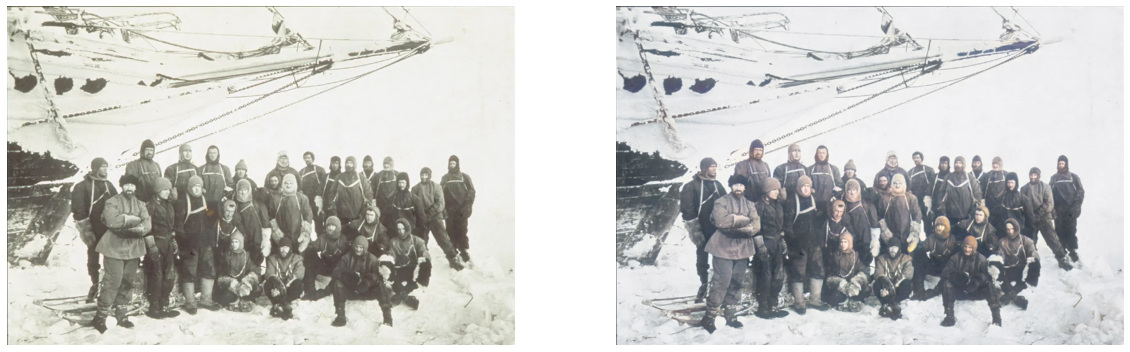

In [16]:
image_path =colorizer.plot_transformed_image('/Users/apichet/25-SHACKLETON-jumbo.jpg', render_factor=render_factor, compare=True, watermarked=watermarked)